# Distributions of numbers of AMC-stellar encounters

In [1]:
%matplotlib inline

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import glob
import re
import dirs

import sys
sys.path.append('../')

import perturbations as PB
import AMC
import orbits

from tqdm import tqdm

rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=18)

In [18]:
MCdata_path = dirs.montecarlo_dir

In [23]:
# Gather the list of files to be used
ff1 = glob.glob(MCdata_path + 'AMC_Ninteractions_*_' + PROFILE + '_circ.txt')
R_list = np.zeros(len(ff1))

for i, fname in enumerate(ff1):
            #print(fname)
    m = re.search('AMC_Ninteractions_a=(.+?)_' + PROFILE + '_circ.txt', fname)
    if m:
        R_string = m.group(1)
        #print(R_string)
        R_list[i]  = float(R_string)       # conversion to pc
R_list = np.sort(R_list)
R_list_lin = np.linspace(1, 10, 10)
R_list = np.array([R_list[np.argmin(np.abs(R - R_list))] for R in R_list_lin])
print(R_list)


[ 0.96  1.93  2.86  3.85  5.17  5.71  6.96  7.68  9.35 10.32]


In [24]:
Ntot_R_PL = []
Ntot_R_NFW = []
for R in R_list:
    print(R)
    Ntot_load_PL = np.loadtxt(MCdata_path + 'AMC_Ninteractions_true_a=%.2f_'%R + 'PL_circ.txt')
    Ntot_R_PL.append(Ntot_load_PL)
    Ntot_load_NFW = np.loadtxt(MCdata_path + 'AMC_Ninteractions_true_a=%.2f_'%R + 'NFW_circ.txt')
    Ntot_R_NFW.append(Ntot_load_NFW)
Ntot_R_PL = np.array(Ntot_R_PL) 
Ntot_R_NFW = np.array(Ntot_R_NFW) 

0.96
1.93
2.86
3.85
5.17
5.71
6.96
7.68
9.35
10.32


In [25]:
n_lines = R_list.size
c = np.arange(0, n_lines+1)

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
#norm = mpl.colors.LogNorm(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.magma)
cmap.set_array([])

#### Generate histograms of numbers of interactions

10.32


<Figure size 504x360 with 0 Axes>

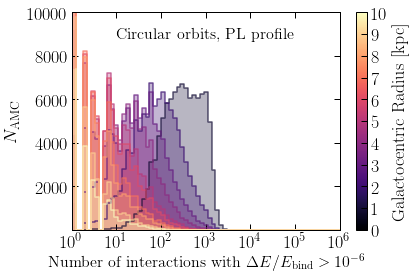

In [26]:
plt.figure(figsize=(7,5))
fig, ax = plt.subplots()
print(R_list[-1])
for i in range(R_list.size):
#     pdf, bin_edges = np.histogram(Ntot_R[i], bins=np.geomspace(Ntot_R[i].min()+1, Ntot_R[i].max(), 10), density=True)
#     bin_c = bin_edges[:-1] + np.diff(bin_edges)/2
    counts, edges, patches = plt.hist(Ntot_R_PL[i], bins=np.geomspace(1, 1e6, 70),color=cmap.to_rgba(i + 1), alpha=0.3)
    plt.step(edges[1:], counts, color=cmap.to_rgba(i + 1),alpha=0.7)
    #plt.hist(Ntot_R[i], bins=np.geomspace(1, 1e6, 70),color=cmap.to_rgba(R_list[i]), alpha=0.3)
#     plt.plot(bin_c, pdf, c=cmap.to_rgba(i + 1))
    
ax.set_xscale('log')
ax.set_xlim(1,1e6)
ax.set_ylim(1,10000)
ax.text(10e0, 8800, r"Circular orbits, " + PROFILE + " profile", fontsize=16)
#ax.text(2e0, 10200, r"Only interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$", fontsize=14)
ax.set_xticks(np.geomspace(1, 1e6, 7))

ax.set_xlabel(r'Number of interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$', fontsize=16)
ax.set_ylabel('$N_\mathrm{AMC}$')

fig.colorbar(cmap, ticks = np.linspace(0, 10, 11), label='Galactocentric Radius [kpc]')
plt.savefig('../../plots/Ndist_' + PROFILE + '_circ.pdf', bbox_inches='tight')

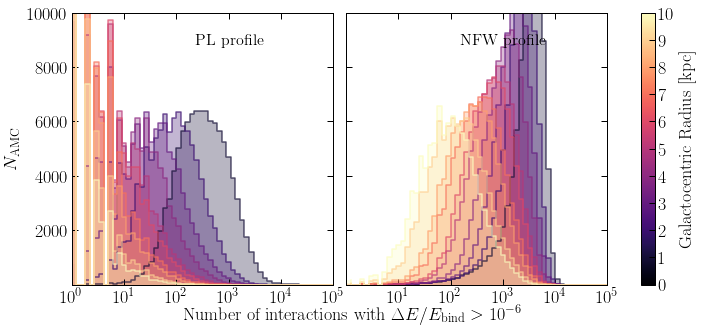

In [26]:
#plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(12,5))
for i in range(R_list.size):
    counts, edges, patches = axes[0].hist(Ntot_R_PL[i], bins=np.geomspace(1, 1e6, 70),color=cmap.to_rgba(i + 1), alpha=0.3)
    axes[0].step(edges[1:], counts, color=cmap.to_rgba(i + 1),alpha=0.7)

for i in range(R_list.size):
    counts, edges, patches = axes[1].hist(Ntot_R_NFW[i], bins=np.geomspace(1, 1e6, 70),color=cmap.to_rgba(i + 1), alpha=0.3)
    axes[1].step(edges[1:], counts, color=cmap.to_rgba(i + 1),alpha=0.7)

for ax in axes:
    ax.set_xscale('log')
    ax.set_xlim(1,1e5)
    ax.set_ylim(1,10000)
    #ax.text(10e0, 8800, r"Circular orbits, " + PROFILE + " profile", fontsize=16)
    #ax.text(2e0, 10200, r"Only interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$", fontsize=14)
    #ax.set_xticks(np.geomspace(1, 1e6, 7))

    #ax.set_xlabel(r'Number of interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$', fontsize=16)

fig.text(0.45, 0.02, r'Number of interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$', fontsize=18, ha='center')
axes[0].set_ylabel('$N_\mathrm{AMC}$')
axes[0].text(1e3, 8800, r"PL profile", fontsize=16, ha='center')
axes[1].text(1e3, 8800, r"NFW profile", fontsize=16, ha='center')

axes[0].set_xticks(np.geomspace(1, 1e5, 6))
axes[1].set_xticks(np.geomspace(10, 1e5, 5))

fig.subplots_adjust(wspace = 0.05)

#[Left, Bottom, Width, Height]
#cax = plt.axes([0.9, 0.1, 0.025, 0.8])
fig.colorbar(cmap, ticks = np.linspace(0, 10, 11), label='Galactocentric Radius [kpc]',ax = axes)

plt.savefig('../../plots/Ndist_circ_combined1.pdf', bbox_inches='tight')

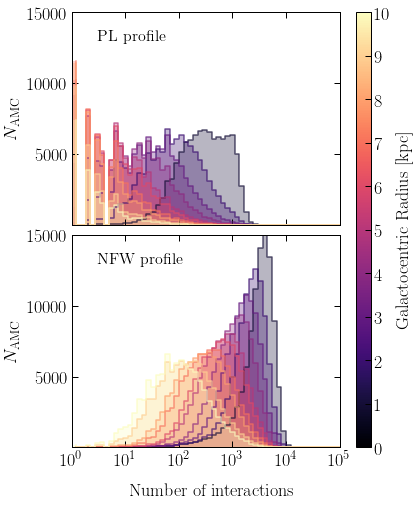

In [38]:
#plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=2, sharey=True,figsize=(6,8))
for i in range(R_list.size):
    counts, edges, patches = axes[0].hist(Ntot_R_PL[i], bins=np.geomspace(1, 1e6, 70),color=cmap.to_rgba(i + 1), alpha=0.3)
    axes[0].step(edges[1:], counts, color=cmap.to_rgba(i + 1),alpha=0.7)

for i in range(R_list.size):
    counts, edges, patches = axes[1].hist(Ntot_R_NFW[i], bins=np.geomspace(1, 1e6, 70),color=cmap.to_rgba(i + 1), alpha=0.3)
    axes[1].step(edges[1:], counts, color=cmap.to_rgba(i + 1),alpha=0.7)

for ax in axes:
    ax.set_xscale('log')
    ax.set_xlim(1,1e5)
    ax.set_ylim(1,15000)
    #ax.text(10e0, 8800, r"Circular orbits, " + PROFILE + " profile", fontsize=16)
    #ax.text(2e0, 10200, r"Only interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$", fontsize=14)
    ax.set_xticks(np.geomspace(1, 1e5, 6))

    #ax.set_xlabel(r'Number of interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$', fontsize=16)

#fig.text(0.45, 0.04, r'Number of interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$', fontsize=18, ha='center')
fig.text(0.45, 0.04, r'Number of interactions', fontsize=18, ha='center')
axes[0].set_ylabel('$N_\mathrm{AMC}$')
axes[1].set_ylabel('$N_\mathrm{AMC}$')
axes[0].text(3, 13000, r"PL profile", fontsize=16, ha='left')
axes[1].text(3, 13000, r"NFW profile", fontsize=16, ha='left')

axes[0].set_xticklabels([])
axes[1].set_xticks(np.geomspace(1, 1e5, 6))
#axes[1].set_xticks(np.geomspace(10, 1e6, 6))

fig.subplots_adjust(hspace = 0.05)

#[Left, Bottom, Width, Height]
#cax = plt.axes([0.9, 0.1, 0.025, 0.8])
fig.colorbar(cmap, ticks = np.linspace(0, 10, 11), label='Galactocentric Radius [kpc]',ax = axes, aspect=30)

plt.savefig('../../plots/Ndist_circ_combined2.pdf', bbox_inches='tight')

#### Sample and plot distribution of $\Delta E/E$

In [28]:
def generate_sample(R, prof='PL'):
    dE_list = []
    R_GC = 1e3*R
    orb = orbits.elliptic_orbit(R_GC, e=0)
    v_circ = orb.vis_viva_r(R_GC)
    #print(v_circ*3.086e+13)
    
    Nsamp = 10
    
    sig_rel = PB.sigma(R_GC)
    Mi, deltai = np.loadtxt(MCdata_path + 'AMC_logflat_a=%.2f_'%R + prof + '_circ.txt', usecols=(0, 2), unpack=True, delimiter=',')
    
    for M, delta in tqdm(zip(Mi, deltai)):
        minicluster = AMC.AMC(M, delta, prof)
        E_test = PB.Elist(sig_rel, 1.0, 1.0, minicluster.M, Rrms2 = minicluster.Rrms2())
        N_cut = 1e6
        bmax = ((E_test/minicluster.Ebind())*N_cut)**(1./4)
        #print(bmax)
        Vlist = PB.dPdV(v_circ, PB.sigma(R_GC), Nsamples=Nsamp)
        blist = bmax*np.sqrt(np.random.rand(Nsamp))
        #print(blist)
        for i in range(Nsamp):
            dE = PB.Elist(Vlist[i], blist[i], 1.0, minicluster.M, Rrms2 = minicluster.Rrms2())/minicluster.Ebind()
            dE_list.append(dE)
    return dE_list

In [29]:
dE_list_R = []
for R in R_list:
    #print(R)
    dE_list_R.append(generate_sample(R, prof="NFW"))

100000it [00:22, 4453.66it/s]
45075it [00:10, 4344.60it/s]

KeyboardInterrupt: 

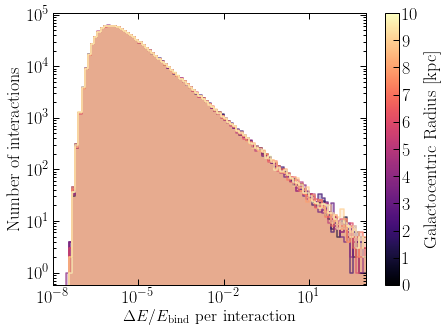

In [97]:
fig, ax = plt.subplots(figsize=(6,5))
#print(R_list[-1])
#for i in [0,]:
#for i in range(R_list.size):
    counts, edges, patches = plt.hist(dE_list_R[7], bins=np.geomspace(1e-8, 1e3, 100),color=cmap.to_rgba(i + 1), alpha=0.3)
    plt.step(edges[1:], counts, color=cmap.to_rgba(i + 1),alpha=0.7)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-8,1e3)
#ax.axvline(1e-6, linestyle='--', color='k')
#ax.set_ylim(1,10000)
#ax.text(10e0, 8800, r"Circular orbits, " + PROFILE + " profile", fontsize=16)
#ax.text(2e0, 10200, r"Only interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$", fontsize=14)
#ax.set_xticks(np.geomspace(1, 1e6, 7))

ax.set_xlabel(r'$\Delta E/E_\mathrm{bind}$ per interaction', fontsize=16)
ax.set_ylabel('Number of interactions')

fig.colorbar(cmap, ticks = np.linspace(0, 10, 11), label='Galactocentric Radius [kpc]')
plt.savefig('../plots/dE_' + PROFILE + '_circ.pdf', bbox_inches='tight')

In [30]:
dE_list_PL = generate_sample(R_list[7], prof='PL')
#dE_list_NFW = generate_sample(R_list[7], prof='NFW')


0it [00:00, ?it/s]
625it [00:00, 6105.02it/s]
Exception in thread Thread-9:
Traceback (most recent call last):
  File "/Users/bradkav/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/bradkav/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/bradkav/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100000it [00:19, 5208.01it/s]


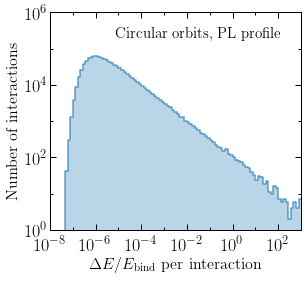

In [32]:
fig, ax = plt.subplots(figsize=(4.5,4))
#print(R_list[-1])
#for i in [0,]:
#for i in range(R_list.size):
counts, edges, patches = plt.hist(dE_list_PL, bins=np.geomspace(1e-8, 1e3, 100),color='C0', alpha=0.3)
plt.step(edges[1:], counts, color='C0',alpha=0.7)

#counts, edges, patches = plt.hist(dE_list_NFW, bins=np.geomspace(1e-8, 1e3, 100),color='C8', alpha=0.3)
#plt.step(edges[1:], counts, color='C8',alpha=0.7)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-8,1e3)
ax.set_ylim(1, 1e6)
#ax.axvline(1e-6, linestyle='--', color='k')
#ax.set_ylim(1,10000)
ax.text(7e-6, 200000, r"Circular orbits, " + PROFILE + " profile", fontsize=15)
#ax.text(2e0, 10200, r"Only interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$", fontsize=14)
#ax.set_xticks(np.geomspace(1, 1e6, 7))
ax.set_xticks(np.geomspace(1e-8, 1e3, 12), minor=True)
ax.set_xticklabels([], minor=True)
ax.set_xticks([1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2])

ax.set_yticks(np.geomspace(1, 1e6, 7), minor=True)
ax.set_yticklabels([], minor=True)

ax.yaxis.set_tick_params(pad=2)
ax.xaxis.set_tick_params(pad=8)

ax.set_xlabel(r'$\Delta E/E_\mathrm{bind}$ per interaction', fontsize=16)
ax.set_ylabel('Number of interactions', fontsize=16)

#fig.colorbar(cmap, ticks = np.linspace(0, 10, 11), label='Galactocentric Radius [kpc]')
plt.savefig('../../plots/dE_hist_circ.pdf', bbox_inches='tight')

In [33]:
dE_grid = np.geomspace(1e-8, 1e3, 100)
dE_count = np.array([np.sum(dE_list_PL > dE) for dE in dE_grid])
#print(dE_count)
dE_count = dE_count/dE_count[0]

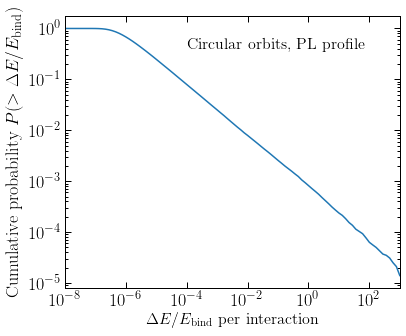

In [34]:
fig, ax = plt.subplots(figsize=(6,5))
#print(R_list[-1])
#for i in [0,]:
#for i in range(R_list.size):
#counts, edges, patches = plt.hist(dE_list_PL, bins=np.geomspace(1e-8, 1e3, 100),color='k', alpha=0.3)
#plt.step(edges[1:], counts, color='k',alpha=0.7)

plt.plot(dE_grid, dE_count)

#counts, edges, patches = plt.hist(dE_list_NFW, bins=np.geomspace(1e-8, 1e3, 100),color='C8', alpha=0.3)
#plt.step(edges[1:], counts, color='C8',alpha=0.7)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-8,1e3)
#ax.axvline(1e-6, linestyle='--', color='k')
#ax.set_ylim(1,10000)
ax.text(1e-4, 0.4, r"Circular orbits, " + PROFILE + " profile", fontsize=16)
#ax.text(2e0, 10200, r"Only interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$", fontsize=14)
#ax.set_xticks(np.geomspace(1, 1e6, 7))

ax.set_xlabel(r'$\Delta E/E_\mathrm{bind}$ per interaction', fontsize=16)
ax.set_ylabel('Cumulative probability $P(> \Delta E/E_\mathrm{bind})$')

#fig.colorbar(cmap, ticks = np.linspace(0, 10, 11), label='Galactocentric Radius [kpc]')
plt.savefig('../../plots/dE_cumulative_circ.pdf', bbox_inches='tight')